# Classification des courriels en tant que SPAMS ou non SPAMS



[Source: UCI Spambase Dataset](https://archive.ics.uci.edu/ml/datasets/spambase) 

-  Nombre d'instances: 4601 (1813 Spam = 39.4%)
-  Nombre d'attributs: 58 (57 continus, 1 label)

- Distribution: 
<table>
<tr><td>Spam</td><td>1813</td><td>(39.4%)</td></tr>
<tr><td>Non-Spam</td><td>2788</td><td>(60.6%)</td></tr>
</table>

## Import des librairies

In [1]:
import pandas as pd                                   # dataframes
import matplotlib.pyplot as plt                       # Représentation des données
import seaborn as sns                                 # Représentation des données
from sklearn.model_selection import train_test_split  # Pour les données d'entrainement et de test 

## Préparation des données

### 1) Import des données

In [2]:
spambase = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase.csv', header=None)

In [3]:
spambase.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 2) Nommage des colonnes

In [4]:
# Nommage séquentiel des colonnes d'attributs en 'X..' et nommage de la dernière colonne en 'y'
spambase.columns = ['X' + str(i) for i in range(0, len(spambase.columns) - 1)] + ['y']

# Vérification 
spambase.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 3) Séparation dataset
Pour préparer l'ensemble de données en vue de faire de la **classification**, nous devons le diviser en deux ensembles, un pour l'apprentissage et l'autre pour le test.

Pour ce faire:<br>
- `train_test_split()` effectue cette séparation en 2 ensembles (apprentissage et test).
- Ensuite j'utiliserai simplement la regex `spambase.filter(regex='\d')` pour extraire les colonnes `X0`, `X1`, ..., `X56` (ce filtre ne conserve que les noms contenant un caractère numérique)
- Je spécifie la variable cible avec laquelle travailler `spambase.y`
- Enfin j'initialise les ensembles `trn` et `tst` 

In [5]:
X_trn, X_tst, y_trn, y_tst = train_test_split(
    spambase.filter(regex='\d'),  
    spambase.y, 
    test_size=0.30,
    random_state=1)

# Création des ensembles d'apprentissage
trn = X_trn
trn['y'] = y_trn

# Creation des ensembles de test
tst = X_tst
tst['y'] = y_tst

## Visualisation du dataset d'apprentissage (trn)

### 1) Diagramme de barres

Utilisation de la fonction countplot() de Seaborn pour créer un diagramme de barres.

<Axes: xlabel='y', ylabel='count'>

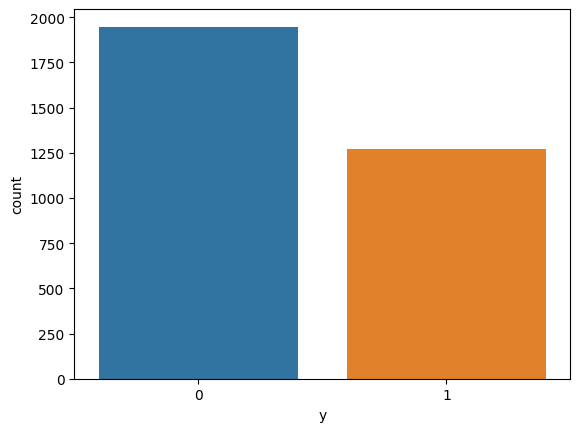

In [6]:
# Comptage des emails spams et non spams du dataset "trn"
sns.countplot(x='y', data=trn)

### 2) Visualisation des variables d'attributs

Je sélectionne 4 colonnes de manière arbitraire

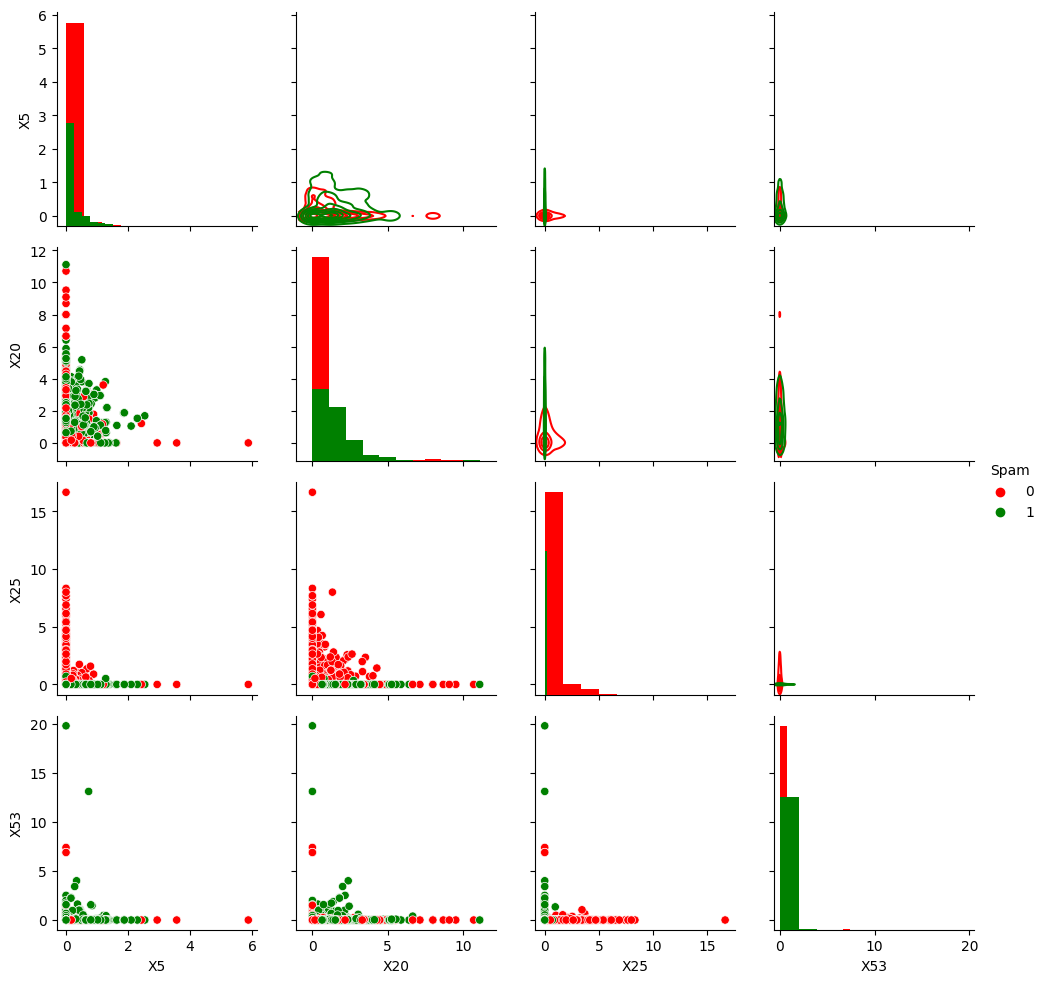

In [7]:
g = sns.PairGrid(
    trn, 
    vars=['X5', 'X20', 'X25', 'X53'], 
    hue='y', # colonne sur laquelle on veut appliquer les couleurs
    diag_sharey=False, 
    palette=['red', 'green'])

# Histogramme sur la diagonale
g.map_diag(plt.hist)

# Diagramme de densité uniquement au dessus de la diagonale
g.map_upper(sns.kdeplot)

# Diagramme de nuage de points uniquement en dessous de la diagonale
g.map_lower(sns.scatterplot)

# Ajout d'une légende
g.add_legend(title='Spam')

## Sauvegarde des ensembles au format CSV 

In [8]:
spambase.to_csv('/workspaces/codespaces-jupyter/data/spambase_formatted.csv', sep=',', index=False)
trn.to_csv('/workspaces/codespaces-jupyter/data/spambase_trn.csv', sep=',', index=False)
tst.to_csv('/workspaces/codespaces-jupyter/data/spambase_tst.csv', sep=',', index=False)



---
---

# **Classification par KNN** 

## Import des librairies




In [9]:
import matplotlib.pyplot as plt                                       # Pour tracer des données
import seaborn as sns                                                 # Pour tracer des données
import pandas as pd                                                   # Pour les dataframes
from sklearn.model_selection import GridSearchCV                      # Pour l'optimisation des paramètres
from sklearn.neighbors import KNeighborsClassifier                    # Pour la classification KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Pour évaluer les résultats

## Préparation des données

Chargement des données d'apprentissage "trn" et de test "tst" des fichiers CSV dans le dossier "data". Et séparation des données explicatives du vecteur X, de la variable à expliquer "y"

In [10]:
# Import des données d'apprentissage
trn = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_trn.csv')

# Séparer les attributs X0-X56 et les mettre dans X_trn
X_trn = trn.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_trn
y_trn = trn.y

# Import des données de test
tst = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_tst.csv')

# Séparer les attributs X0-X56 et les mettre dans X_tst
X_tst = tst.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_tst
y_tst = tst.y

# labels
spam = ['Non Spam','Spam']

Vérification avec les premières lignes des données d'apprentissage

In [11]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


## KNN: Entrainement du modèle

Pour entrainer un modèle de type KNN, il faut utiliser "KNeighborsClassifier" de scikit learn et passer en paramètres, le chiffre représentant **K**, les données d'apprentissage et de test.

In [12]:
# Setup du modèle KNN avec les données
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

result_knn_trn = str("{:.2%}".format(knn.score(X_trn, y_trn)))

## Pourcentage de précision moyenne obtenu sur les données d'entraînement

In [13]:
print(
    'KNN => Niveau de précision sur les données d\'apprentissage: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

KNN => Niveau de précision sur les données d'apprentissage: 86.77%


## KNN: Optimisation du modèle

Avec KNN, cela peut demander un peu de travail afin de déterminer le nombre **K** optimal. En ce sens on peut utiliser `GridSearchCV` de scikit learn

In [14]:
# Setup de l'objet kNN 
knn = KNeighborsClassifier() 

# paramètres de recherches pour K: entre 3 et 15, avec un pas de 2
param = range(3, 15, 2)

# Setup de l'objet GridSearchCV avec les paramètres de recherche K
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Estimation du meilleur modèle selon les données d'entrées
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_  

# Affichage du modèle optimal
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Le résultat suivant obtenu indique que le **K** optimal pour ce modèles est **3**:

```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}
```



In [15]:
cv_results = pd.DataFrame(grid.cv_results_).sort_values("mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002653,0.000236,0.021622,0.001331,3,{'n_neighbors': 3},0.793478,0.788820,0.774845,0.809006,0.810559,0.795342,0.013300,1
1,0.002446,0.000035,0.020840,0.000149,5,{'n_neighbors': 5},0.782609,0.787267,0.768634,0.802795,0.791925,0.786646,0.011223,2
2,0.002746,0.000509,0.027716,0.008510,7,{'n_neighbors': 7},0.782609,0.768634,0.788820,0.804348,0.787267,0.786335,0.011478,3
3,0.002574,0.000141,0.022778,0.002531,9,{'n_neighbors': 9},0.776398,0.774845,0.777950,0.804348,0.784161,0.783540,0.010874,4
4,0.002588,0.000194,0.022180,0.000549,11,{'n_neighbors': 11},0.760870,0.777950,0.763975,0.791925,0.770186,0.772981,0.011128,5


Donc une fois ce paramètre optimal trouvé, nous pouvons visualiser la validation croisée (CV: cross validation) via l'attribut `cv_results` de la variable `grid`:

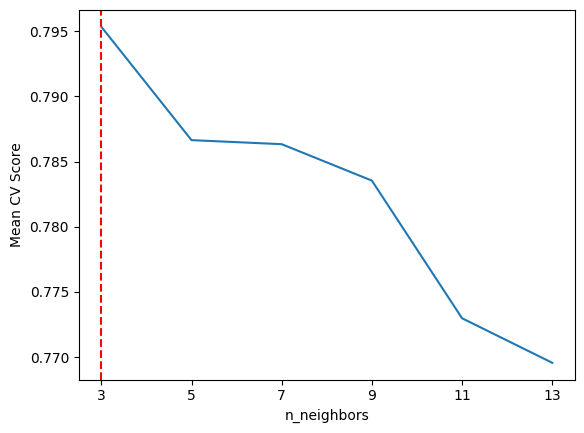

In [16]:
# Initialisation pyplot du graphique représentant le
# mean_test_score que sklearn renvoie: C'est la moyenne calculée
# sur tous les échantillons où chaque échantillon a le même poids
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Et on dessine une droite verticale rouge où le meilleur modèle se trouve
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

## Modèle de test

Donc ici on évalue la précision du modèle d'apprentissage sur l'ensemble de test. La matrice de confusion (confusion matrix) est un outil qui nous indique la proportion de vrais positifs/vrais négatifs/faux positifs/faux négatifs

Ici on essaye de "prédire" la variable cible de test, à partir des données de test, ceci en utilisant l'outil "best_estimator" calculé par GridSearchCV

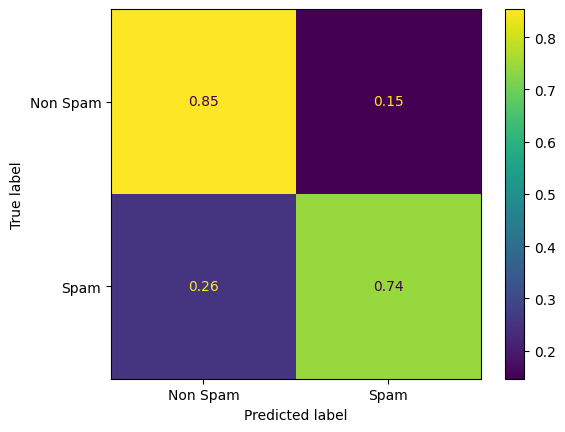

In [17]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_tst, y_tst, display_labels=spam, normalize='true') 



La matrice de confusion nous apporte de précieuses informations:
*  Vrais positifs spams
*  Faux positifs spams
*  Vrais positifs non-spams
*  Faux positifs non-spams 








In [18]:
result_knn_tst =str("{:.2%}".format(best_knn.score(X_tst, y_tst)))

print(
    'KNN => Précision moyenne sur les données de test: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

KNN => Précision moyenne sur les données de test: 81.10%




---
---
# **Classification par Naive Bayes (Gaussienne et Multinomiale)**


## Import des librairies



In [19]:
import matplotlib.pyplot as plt                                       # Pour tracer des données
import seaborn as sns                                                 # Pour tracer des données
import pandas as pd                                                   # Pour les dataframes
from sklearn.model_selection import GridSearchCV                      # Pour l'optimisation des paramètres
from sklearn.naive_bayes import MultinomialNB, GaussianNB             # Pour la classification Naive Bayes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Pour évaluer les résultats

## Préparation des données

Chargement des données d'apprentissage "trn" et de test "tst" des fichiers CSV dans le dossier "data". Et séparation des données explicatives du vecteur X, de la variable à expliquer "y"

In [20]:
# Import des données d'apprentissage
trn = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_trn.csv')

# Séparer les attributs X0-X56 et les mettre dans X_trn
X_trn = trn.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_trn
y_trn = trn.y

# Import des données de test
tst = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_tst.csv')

# Séparer les attributs X0-X56 et les mettre dans X_tst
X_tst = tst.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_tst
y_tst = tst.y

# labels
spam = ['Non Spam','Spam']

Vérification avec les premières lignes des données d'apprentissage

In [21]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


## Naive Bayes: Entrainement du modèle

Il faut utiliser l'objet "MultinomialNB" et "GaussianNB" de scikit learn pour classifier les emails spams et non-spams avec l'algorithme Naive Bayes multinomial et gaussien

In [22]:
mnb = MultinomialNB() \
     .fit(X_trn, y_trn)

gnb = GaussianNB() \
     .fit(X_trn, y_trn)

result_mnb_trn = str("{:.2%}".format(mnb.score(X_trn, y_trn)))
result_gnb_trn = str("{:.2%}".format(gnb.score(X_trn, y_trn)))

Pourcentage de précision moyenne obtenu sur les données d'entraînement

In [23]:
print(
    'Niveau de précision sur les données d\'apprentissage avec Naive Bayes multinomial: ' 
    + str("{:.2%}".format(mnb.score(X_trn, y_trn))))

print(
    'Niveau de précision sur les données d\'apprentissage avec Naive Bayes Gaussien: ' 
    + str("{:.2%}".format(gnb.score(X_trn, y_trn))))

Niveau de précision sur les données d'apprentissage avec Naive Bayes multinomial: 79.16%
Niveau de précision sur les données d'apprentissage avec Naive Bayes Gaussien: 82.20%


## Modèle de test

## Visualisation de la matrice de confusion pour l'essai avec le modèle Naive Bayes Multinomial

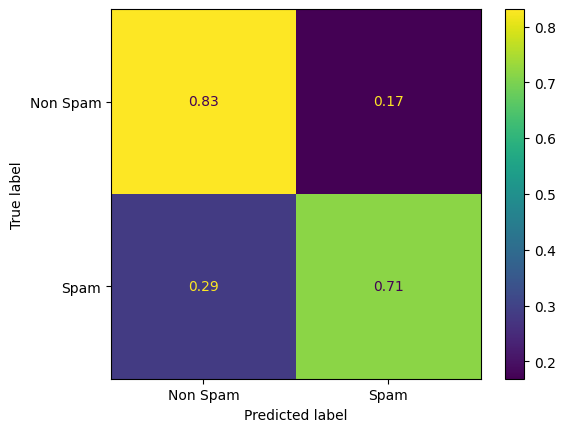

In [24]:
ConfusionMatrixDisplay.from_estimator(mnb, X_tst, y_tst, display_labels=spam, normalize='true') 


In [25]:
result_mnb_tst =  str("{:.2%}".format(mnb.score(X_tst, y_tst)))

print(
    'Naive Bayes Multinomial => Précision moyenne sur les données de test: ' 
    + str("{:.2%}".format(mnb.score(X_tst, y_tst))))

Naive Bayes Multinomial => Précision moyenne sur les données de test: 78.57%


## Visualisation de la matrice de confusion pour l'essai avec le modèle Naive Bayes Gaussien

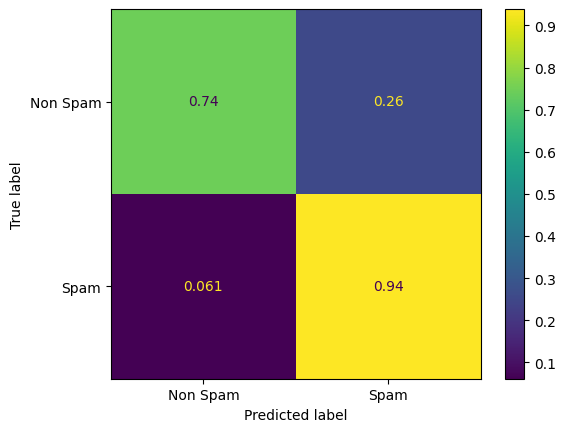

In [26]:
ConfusionMatrixDisplay.from_estimator(gnb, X_tst, y_tst, display_labels=spam, normalize='true') 

## Précision moyenne sur les données de test

In [27]:
result_gnb_tst = str("{:.2%}".format(gnb.score(X_tst, y_tst)))

print(
    'Naive Bayes Gaussien => Précision moyenne sur les données de test: ' 
    + str("{:.2%}".format(gnb.score(X_tst, y_tst))))

Naive Bayes Gaussien => Précision moyenne sur les données de test: 82.04%


---
---
# **Classification par Arbre de Décision**

## Import des librairies

In [28]:
import matplotlib.pyplot as plt                                       # Pour tracer des données
import seaborn as sns                                                 # Pour tracer des données
import pandas as pd                                                   # Pour les dataframes
from sklearn.model_selection import GridSearchCV                      # Pour l'optimisation des paramètres
from sklearn.tree import DecisionTreeClassifier, plot_tree            # Pour les arbres de décisions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Pour évaluer les résultats

## Préparation des données

Chargement des données d'apprentissage "trn" et de test "tst" des fichiers CSV dans le dossier "data". Et séparation des données explicatives du vecteur X, de la variable à expliquer "y"

In [29]:
# Import des données d'apprentissage
trn = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_trn.csv')

# Séparer les attributs X0-X56 et les mettre dans X_trn
X_trn = trn.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_trn
y_trn = trn.y

# Import des données de test
tst = pd.read_csv('/workspaces/codespaces-jupyter/data/spambase_tst.csv')

# Séparer les attributs X0-X56 et les mettre dans X_tst
X_tst = tst.filter(regex='\d')

# Séparer la dernière colonne X57 (variable de classe) et la mettre dans y_tst
y_tst = tst.y

# labels
spam = ['Non Spam','Spam']

Vérification avec les premières lignes des données d'apprentissage

In [30]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


# ARBRE DE DÉCISION : Entrainement du modèle

## Ajustement des données d'entraînement
Une méthode simple pour entrainer un arbre de décision, cela consiste à créer un objet `DecisionTreeClassifier` et à l'adapter aux données d'apprentissage. Cet objet dispose d'une méthode `score()` qui renverra la précision du modèle sur les données. Le `DecisionTreeClassifier` nécessite deux paramètres :

- `criterion` : peut être `entropy` ou `gini`
- `max_leaf_nodes` : spécifie la taille de l'arbre en indiquant explicitement le nombre total de nœuds de type "feuille".

In [31]:
# Création de l'objet DecisionTreeClassifier avec le critère entropy
ad = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_leaf_nodes=7) 

# Ajustement de l'arbre de décision aux données d'apprentissage
ad.fit(X_trn,y_trn)

result_ad_trn = str("{:.2%}".format(ad.score(X_trn, y_trn)))

## Pourcentage de précision moyenne obtenu sur les données d'entraînement

In [32]:
print(
    'Arbre de décision => Niveau de précision sur les données d\'apprentissage: ' 
    + str("{:.2%}".format(ad.score(X_trn, y_trn))))

Arbre de décision => Niveau de précision sur les données d'apprentissage: 89.84%


## Optimisation de l'arbre de décision

Je vais utiliser GridSearchCV afin de trouver une version plus optimisée de cet arbre de décision. 
Je vais utiliser le paramètre `max_leaf_nodes` ainsi que le `criterion` dans le dictionnaire param, GridSearchCV testera et renverra la meilleure combinaison.
Je n'ajoute pas plus de paramètre à `param` car cela augmentera l'espace de recherche et le temps nécessaire à l'exécution de GridSearchCV. Tel qu'il est recommandé il faut commencer avec une grille de paramètres plus petite et augmenter au besoin progressivement le nombre de paramètres à optimiser en fonction des ressources informatiques disponibles et des contraintes de temps. 
En termes de critères, je vais utiliser le critère précédemment utilisé `entropy` (quantité d'incertitude) mais aussi `gini` ( mesure la probabilité qu'une instance aléatoire soit mal classée lorsqu'elle est choisie au hasard.Plus l'indice de Gini est bas, plus la probabilité d'erreur de classification est faible)

In [33]:
# Initialisation de l'objet DecisionTreeClassifier 
dt = DecisionTreeClassifier(
    random_state=1) 

# Valeurs Possibles à essayer avec un pas de 2, pour for max_leaf_nodes
param = range(6,45,2)

#initialisation de l'objet GridSearchCV 
grid = GridSearchCV(
    dt,
    {'max_leaf_nodes': param, 
     'criterion': ['entropy','gini']})

# Ajustement de GridSearchCV aux données d'apprentissage
grid.fit(X_trn,y_trn)

# Modèle optimum 
best_dt = grid.best_estimator_

# Affichage des meilleures valeurs 
best_dt.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

## Précision du tracé par rapport à divers paramètres
Le code ci-dessous crée un graphique de précision par rapport à différentes valeurs de `max_leaf_nodes`.

 Les mesures « gini » et « entropy » sont tracées séparément.

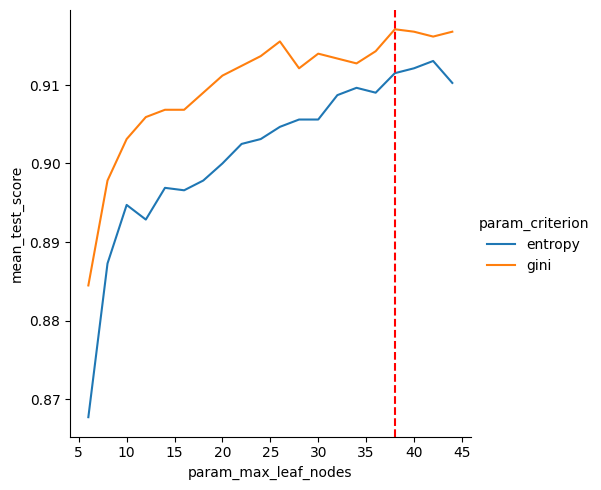

In [34]:
# Précision moyenne par rapport à max_leaf_nodes
sns.relplot(
    data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
    kind='line',
    x='param_max_leaf_nodes', 
    y='mean_test_score', 
    hue='param_criterion'
)

# Ligne rouge verticale qui indique le meilleur modèle
plt.axvline(
    x=best_dt.max_leaf_nodes, 
    color='red', 
    ls='--')

## Affichage de l'arbre de décision
J'Utilise `plot_tree()` pour afficher l'arbre de décision. Les deux labels de classe ont deux nuances différentes pour les distinguer.

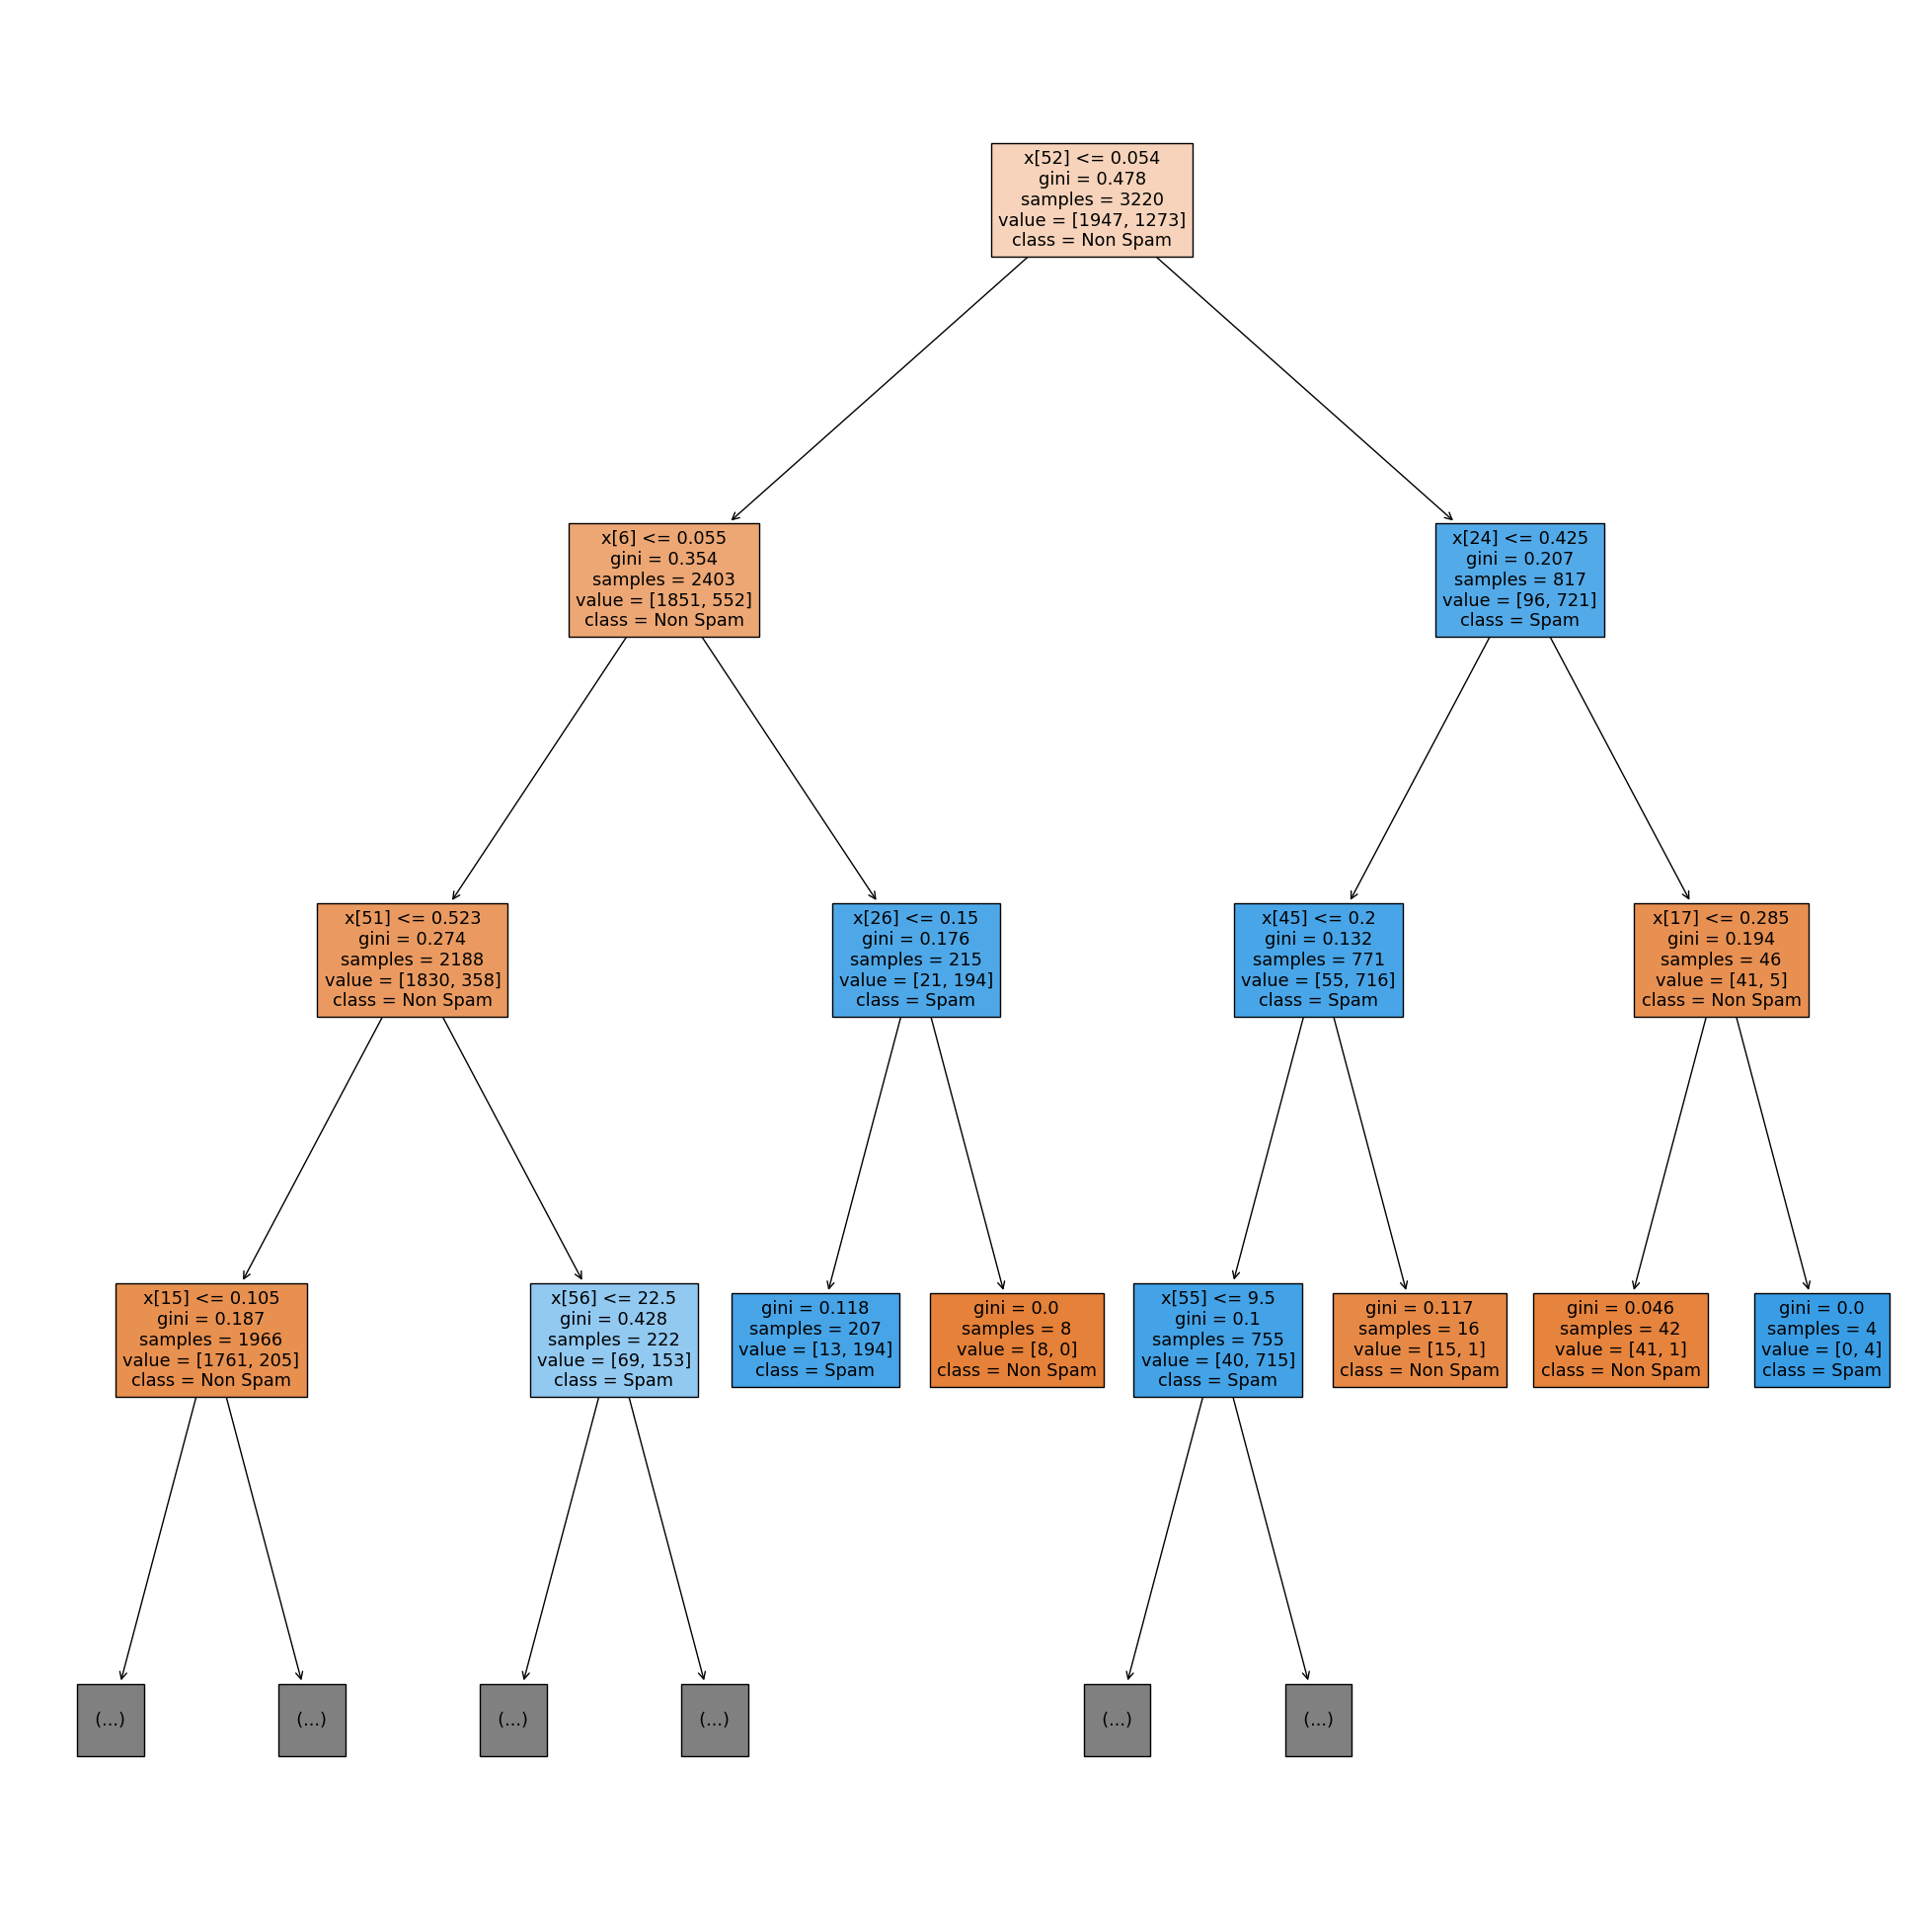

In [35]:
# Configuration de la taille
fig = plt.figure(figsize=(25, 25))

# Affichage visuel du modèle
# On garde max_depth à 3 pour une meilleur visualisation
t = plot_tree(
    best_dt,
    class_names=spam,
    max_depth=3,
    filled=True)

## Modèle de test

Affichage de la matrice de confusion pour les données de test "tst" en utilisant le modèle d'arbre de décision optimal, "best_dt", trouvé dans la phase d'apprentissage. La "matrice de confusion" indique la proportion des vrais positifs, des vrais négatifs, des faux positifs et des faux négatifs.

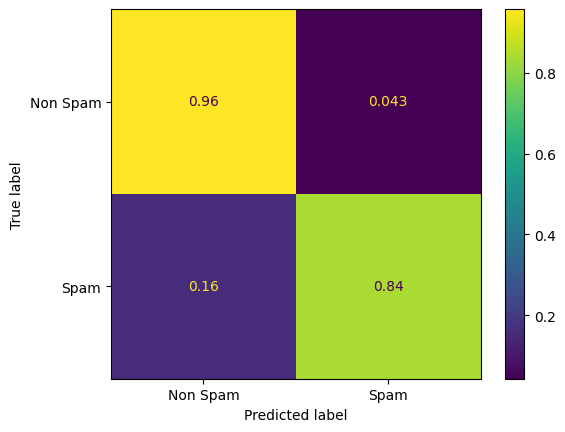

In [36]:
ConfusionMatrixDisplay.from_estimator(best_dt, X_tst, y_tst, display_labels=spam, normalize='true') 

## Précision moyenne sur les données de test

In [37]:
result_ad_tst = str("{:.2%}".format(best_dt.score(X_tst, y_tst)))

print(
    'Arbre de Décision => Précision moyenne sur les données de test: ' 
    + str("{:.2%}".format(best_dt.score(X_tst, y_tst))))

Arbre de Décision => Précision moyenne sur les données de test: 91.24%


---
---



# Conclusion

J'ai donc pu tester différentes méthodes algorithmiques sur le jeu de données "spambase". Voici un tableau qui récapitule les résultats obtenus sur jeu d'apprentissage et de test des différents algorithmes:


In [38]:
import pandas as pd 


df = pd.DataFrame({"Training":[result_knn_trn, result_mnb_trn, result_gnb_trn, result_ad_trn],
                 "Test":[result_knn_tst, result_mnb_tst, result_gnb_tst, result_ad_tst]})

df.index = ["knn", "Naive Bayes Mult.", "Naive Bayes Gauss.", "Arbre Decision"]

df.style.highlight_max(axis=0, color='darkgreen')

,Training,Test
knn,86.77%,81.10%
Naive Bayes Mult.,79.16%,78.57%
Naive Bayes Gauss.,82.20%,82.04%
Arbre Decision,89.84%,91.24%
